# Most Cited Topics : ChatGPT + NLTK

In [1]:
import numpy as np
import pandas as pd
import config
import jupyter_service
import sys
import matplotlib.pyplot as plt
from dbcontext import Context
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.display.float_format = '{:.2f}'.format
print(sys.version, np.__version__, pd.__version__, config.version)
context = Context()
context.create(echo=False)
service = jupyter_service.JupyterService(context)
nb_form=15854
pd.set_option('max_colwidth', 1000)
print(config.connection_string)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)] 2.0.2 2.2.3 0.1.0.Beta
postgresql://postgres:sa@localhost:5432/yt1


In [2]:
question_nb=12
mode="gpt-4o-mini"

Stats

In [3]:
df = service.get_stats(mode)
avg=float(df.iloc[0].average)
median=float(df.iloc[0].median_)
percentile=float(df.iloc[0].percentile)
df

,average,median_,quartile,decile,percentile
0,26.64,4.00,2.00,2.00,2.00


Empathy Most Cited Topics

In [24]:
empathy_category="pd"
df = service.get_scores(mode, question_nb, empathy_category, positive=True, denominator_thresold=0, numerator_thresold=0, gpt_comment=True, debug=False, sentiment=False)
df = df.sort_values(by=["nb_positive_form"], ascending=False)
print(f"{empathy_category} most cited positive topics")
df.head(10)

pd most cited positive topics


,id,topic,nb_positive_form,nb_negative_form,score,explaination,citation
1037,30719,peace,696,633.00,1.10,"Personal fulfillment, peace, happiness, stability, and cooperation foster a harmonious life and a thriving, sustainable world.",696
1048,30734,happiness,599,581.00,1.03,"Positive terms related to personal distress and happiness include love, health, success, respect, innovation, peace, harmony, inclusivity, and sustainability.",599
1262,30801,success,342,357.00,0.96,"Success brings happiness, stability, and personal fulfillment, while fostering a compassionate and peaceful world for all.",342
1258,30784,health,288,298.00,0.97,"Positive terms related to personal distress and health include wellness, resilience, joy, harmony, community support, empowerment, balance, and fulfillment.",288
1281,30818,family,238,279.00,0.85,"Personal distress can lead to growth, unity, resilience, understanding, compassion, community support, and strong family bonds.",238
1027,30703,life,220,190.00,1.16,"achieve happiness, balance, fulfillment, peace, and sustainability in life, enhancing personal well-being and collective harmony.",220
1263,30763,environment,196,206.00,0.95,"to improve well-being and environmental sustainability, fostering happiness, balance, and cooperation for a better world.",196
1007,30791,good,194,158.00,1.23,"Positive terms related to personal distress and well-being include happiness, health, prosperity, peace, kindness, good relationships, and fulfillment.",194
911,30740,world,187,105.00,1.78,"Fostering happiness, peace, sustainability, education, kindness, and cooperation creates a promising future for individuals and the world.",187
1000,30704,happy,187,149.00,1.26,"Happiness encompasses joy, fulfillment, peace, love, health, success, connection, and a harmonious existence for all.",187


In [25]:
df = service.get_scores(mode, question_nb, empathy_category, positive=False, denominator_thresold=0, numerator_thresold=0, sentiment=False, gpt_comment=True, debug=False)
df = df.sort_values(by=["nb_negative_form"], ascending=False)
print(f"{empathy_category} most cited negative topics")
df.head(10)


pd most cited negative topics


,id,topic,nb_negative_form,nb_positive_form,score,explaination,citation
1234,30719,peace,633,696.00,0.91,"Negative terms related to personal distress include anxiety, conflict, division, violence, poverty, war, stress, discrimination, and hostility.",633
1223,30734,happiness,581,599.00,0.97,"Negative terms related to personal distress include anxiety, depression, isolation, dissatisfaction, stress, hopelessness, and conflict.",581
1009,30801,success,357,342.00,1.04,"Negative terms related to personal distress and success include disappointment, stress, pressure, dissatisfaction, burnout, competition, and insecurity.",357
1013,30784,health,298,288.00,1.03,"Negative terms related to personal distress and health include stress, anxiety, depression, illness, pain, suffering, fatigue, burnout, dissatisfaction, and loneliness.",298
990,30818,family,279,238.00,1.17,"Negative terms related to personal distress and family include anxiety, conflict, instability, poverty, neglect, estrangement, dysfunction, and unhappiness.",279
1008,30763,environment,206,196.00,1.05,"Negative terms related to personal distress and environment include pollution, inequality, instability, violence, and exploitation, impacting mental wellbeing and ecology.",206
1244,30703,life,190,220.00,0.86,"Negative terms related to personal distress and life include stress, anxiety, poverty, discrimination, conflict, pollution, inequality, instability, and despair.",190
1264,30791,good,158,194.00,0.81,"Negative terms related to personal distress include anxiety, loneliness, depression, stress, and dissatisfaction, which hinder well-being and happiness.",158
1014,30721,equality,156,151.00,1.03,"Negative terms include injustice, discrimination, inequality, marginalization, exclusion, oppression, and social unrest, leading to personal distress and division.",156
1271,30704,happy,149,187.00,0.80,"Negative terms related to personal distress and happiness include anxiety, sadness, loneliness, unfulfillment, anger, discontent, dissatisfaction, and despair.",149


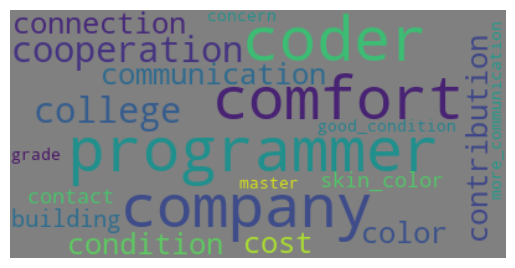

In [23]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    df_lema = pd.concat([df_lema1, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)

In [45]:
df = service.get_scores(mode, question_nb, empathy_category, positive=True, denominator_thresold=0, numerator_thresold=5, sentiment=False, gpt_comment=True)
df=df[(df.score > 6) & (df.nb_positive_form < 50)] 
print(f"Low noise {empathy_category} positive score")
df.to_csv(f"out/chatgpt_low_{empathy_category}2.csv", index=False)
df.head(10)

Low noise pd positive score


,id,topic,nb_positive_form,nb_negative_form,score,explaination
0,31947,becomebetter,42,NaN,420.00,"Personal distress can lead to growth, empathy, resilience, self-awareness, and improved relationships, fostering overall well-being and strength."
1,31948,numerous,42,NaN,420.00,"Resilience, growth, support, empathy, self-awareness, healing, empowerment, compassion, adaptation, transformation, connection, perseverance."
2,30882,billionaire,9,NaN,90.00,"Aspiring billionaires seek to create positive change, support communities, invest in sustainability, and foster professional success and happiness."
3,30981,secure,7,NaN,70.00,"Positive terms: happiness, security, freedom, peace, independence, acceptance, health, sustainability, financial stability, joy, success, community."
4,30946,succes,6,NaN,60.00,"Personal distress can lead to growth, while success brings happiness, peace, stability, equality, and opportunities for all."
5,31008,wellness,10,1.00,10.00,"Health, happiness, peace, wellness, success, stability, sustainability, love, kindness, fulfillment, community, equality, growth, and harmony."
6,31386,need,7,1.00,7.00,"Empathy, support, community, sustainability, happiness, equality, love, connection, fulfillment, and environmental stewardship enhance personal growth and well-being."
7,32440,cohesion,7,1.00,7.00,"Personal distress can foster empathy, while cohesion promotes unity, understanding, and collective growth towards a peaceful and inclusive society."


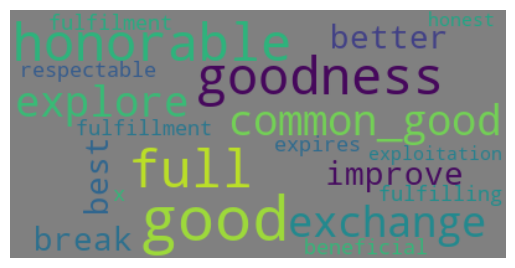

In [40]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    df_lema = pd.concat([df_lema1, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)

In [26]:
topic = "independence"
df = service.get_gpt_comment(topic, question_nb, "ec", True)
print(df.iloc[0]["explaination"])

Empathic concern fosters compassion for others, while independence promotes self-reliance and personal development, leading to a harmonious society.
